# Final Evaluation
## Problem 1.
### a) Finding the a polynomial to fit the data

Loading the packages and reading the data.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import numpy.polynomial.polynomial as poly
#from numpy.polynomial import Polynomial

In [2]:
data = pd.read_csv('problem1.csv')
data.head(-10)

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611
...,...,...,...,...
119,1.57,4.096029,NaN,NaN
120,1.60,4.341366,NaN,NaN
121,1.63,4.355296,NaN,NaN
122,1.66,4.061534,NaN,NaN


Setting and checking the data

In [3]:
x_train = data.X_training
y_train = data.Y_training

Plotting raw data

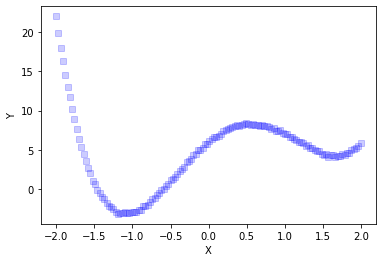

In [4]:
ax = plt.plot(x_train, y_train,'bs',alpha=0.2,)
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('fdx.pdf', format='pdf', dpi=1200, bbox_inches="tight")
plt.show()

### Polynomial Fitting

Using the Polynomial Module from Numpy in order to fit a polynomial to the data using the least square method.

In [5]:
coef = poly.polyfit(x_train, y_train, 8,rcond=None,w=None) # Assuming a Polynomyal degree 8

#### Creating and plotting the resulting Polynomial Model 

In [6]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.00793895e+00,  8.03796810e+00, -6.06320867e+00, -3.02503500e+00,
        2.09500406e+00,  8.00105182e-03, -4.29431659e-02, -1.12113794e-03,
        5.73512923e-03], domain=[-1,  1], window=[-1,  1])

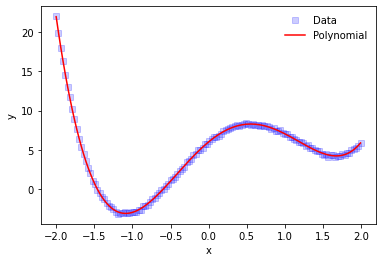

In [7]:
plt.plot(x_train, y_train,'bs',alpha=0.2, label='Data')
plt.plot(x_train,model(x_train),'r', label='Polynomial')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### b) Finding the best polynomial to fit the data

In [8]:
Pol_Max = 15 #We will check for polynomials with max degree 15
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

Checking different polynomials  and calculating the corresponding RSS and AIC.

In [9]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x_train, y_train, i+1)        
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y_train-model(x_train))**2)
        AICv[i]=len(x_train)*math.log10(RSSv[i]/len(x_train))+ 2*len(coef)*len(x_train)/(len(x_train)-len(coef)-1)

#### Plotting the RSS and AIC.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


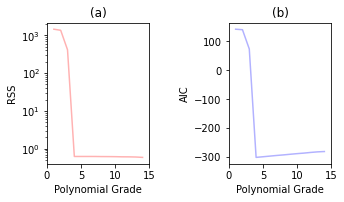

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.savefig('AIC.pdf', format='pdf', dpi=1200, bbox_inches="tight")
plt.show()

With the graphs is clear that the degree with lowest RSS and AIC is 4. Remember that the lower AIC does not implies the best model, insted the corresponding polynomial model of degree 4 is better model that the others we checked.

In [11]:
grade = np.argmin(AICv)+1
grade

4

In [12]:
poly.polyfit(x_train, y_train, grade)

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

Then, we choose the next polynomial.

In [13]:
coef4 = poly.polyfit(x_train, y_train, 4,rcond=None,w=None)
model4 = poly.Polynomial(coef4)
model4

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

### c) Cross Validating the polynomial with the testing data

Loading the testing data and checking the predicton with the polinomyal of degree 4.

In [16]:
x_test = data.X_test
y_test = data.Y_test
x_test = x_test[~np.isnan(x_test)]
y_test = y_test[~np.isnan(y_test)]

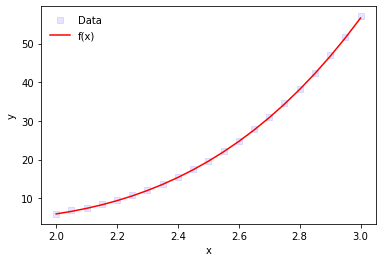

In [17]:
plt.plot(x_test, y_test,'bs',alpha=0.1, label='Data')
plt.plot(x_test, model4(x_test),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Now, we use the cross validation technique to confirm that this is the best model among the other degree that we checked.

I had problems when I've tried to use cross_val_score because the previous 'model4' is not an estimator that the package support, so I had to create another one, that also works and it is supported.

In [29]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

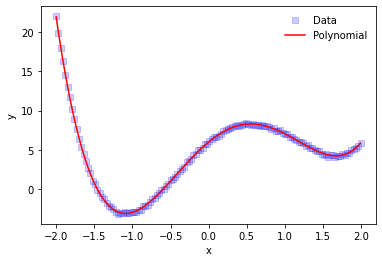

In [39]:
plt.plot(x_train, y_train,'bs',alpha=0.2, label='Data')
plt.plot(x_train, pol.predict(x_train),'r', label='Polynomial')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


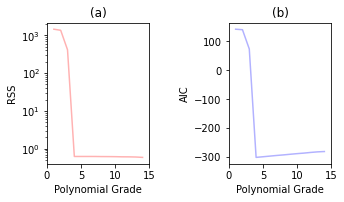

In [57]:
Pol_Max = 15 #We will check for polynomials with max degree 15
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

for i in np.arange(0,Pol_Max-1,1):
        poli = PolynomialRegression(deg=i+1)
        poli.fit(x_train, y_train)
        coef = poli.coef_
        RSSv[i]=0.5*np.sum((y_train-poli.predict(x_train))**2)
        AICv[i]=len(x_train)*math.log10(RSSv[i]/len(x_train))+ 2*len(coef)*len(x_train)/(len(x_train)-len(coef)-1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.savefig('AIC.pdf', format='pdf', dpi=1200, bbox_inches="tight")
plt.show()

In [58]:
grade = np.argmin(AICv)+1
grade

4

In [38]:
pol = PolynomialRegression(deg=4)
pol.fit(x_train, y_train)
pol.coef_

array([ 1.99588109, -3.00869471, -5.99141415,  8.02956741,  6.0000592 ])

With this, we check that all works in the same way, so let's continue with the cross validation.

In [77]:
X = np.append(x_train,x_test)
y = np.append(y_train,y_test)

In [79]:
from sklearn.model_selection import GridSearchCV
MODEL = PolynomialRegression()
degrees = np.arange(1, 25)
cv_model = GridSearchCV(MODEL,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
cv_model.fit(X,y);
cv_model.best_params_, cv_model.best_estimator_.coef_

({'deg': 4},
 array([ 1.99991007, -3.00376068, -6.00032098,  8.02203263,  6.00194025]))

In [82]:
df = pd.DataFrame(cv_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_deg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0004,2.000333e-04,0.0003,0.000245,1,{'deg': 1},-2.193720e+02,-27.765978,-0.363018,-50.176340,-3.628006e+02,-1.320956e+02,1.384131e+02,7
1,0.0002,2.448728e-04,0.0003,0.000245,2,{'deg': 2},-3.710167e+01,-12.435596,-99.768053,-17.222279,-1.612003e+02,-6.554558e+01,5.707167e+01,6
2,0.0005,3.814697e-07,0.0001,0.000200,3,{'deg': 3},-2.252102e+03,-51.480645,-90.362979,-11.983813,-4.032481e+03,-1.287682e+03,1.615747e+03,9
3,0.0003,2.449313e-04,0.0002,0.000245,4,{'deg': 4},-1.176407e-02,-0.008359,-0.008148,-0.013170,-1.199638e-01,-3.228094e-02,4.388422e-02,1
4,0.0003,2.450091e-04,0.0003,0.000245,5,{'deg': 5},-1.251214e-02,-0.008433,-0.008304,-0.013221,-4.395890e-01,-9.641192e-02,1.716005e-01,2
5,0.0003,2.450091e-04,0.0002,0.000245,6,{'deg': 6},-4.106462e-01,-0.009867,-0.008550,-0.013364,-2.735150e+00,-6.355154e-01,1.061190e+00,3
6,0.0004,2.000333e-04,0.0002,0.000245,7,{'deg': 7},-2.460083e+00,-0.009416,-0.008354,-0.013493,-5.018422e+01,-1.053511e+01,1.984724e+01,4
7,0.0002,2.451064e-04,0.0002,0.000245,8,{'deg': 8},-3.542043e+01,-0.007889,-0.008614,-0.018482,-1.407278e+02,-3.523665e+01,5.449922e+01,5
8,0.0003,2.450482e-04,0.0002,0.000245,9,{'deg': 9},-7.128185e-01,-0.010979,-0.008497,-0.018215,-3.209918e+03,-6.421337e+02,1.283892e+03,8
9,0.0002,2.449896e-04,0.0002,0.000245,10,{'deg': 10},-1.106807e+02,-0.009543,-0.009205,-0.018756,-5.153625e+04,-1.032939e+04,2.060347e+04,10
